In [1]:
import torch
from torch import nn
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '/home/artemiy/rink_master/rink_master_data/final_dataset.csv', index_col='Unnamed: 0'
)

df.head()

,gameID,gameDate,Team,Opponent,homeRoad,OTLoss,points,pointPct,regulationWins,regulationAndOtWins,...,rolling_shotGoalsPct,rolling_savePct,rolling_powerPlayPct,rolling_penaltyKillPct,rolling_shotsFor,rolling_shotsAgainst,rolling_powerPlayNetPct,rolling_penaltyKillNetPct,rolling_homeWin,rolling_roadWin
1,2003020097,2003-10-24,1,5,1,0,2,1.0,1,1,...,0.03,0.91,0.00,1.00,33.00,23.00,0.00,1.00,0.0,0.00
2,2003020109,2003-10-25,1,6,0,0,0,0.0,0,0,...,0.04,0.93,0.00,1.00,33.50,20.50,0.00,1.00,0.0,0.00
3,2003020122,2003-10-28,1,2,1,0,2,1.0,1,1,...,0.05,0.89,0.07,0.83,33.33,22.33,0.07,0.92,1.0,0.00
4,2003020139,2003-10-30,1,4,0,0,2,1.0,1,1,...,0.07,0.92,0.05,0.88,31.75,23.00,0.05,0.94,0.0,0.00
5,2003020147,2003-11-01,1,20,0,0,2,1.0,1,1,...,0.08,0.91,0.07,0.90,31.00,21.60,0.07,0.95,0.0,0.33


In [3]:
df.columns

Index(['gameID', 'gameDate', 'Team', 'Opponent', 'homeRoad', 'OTLoss',
       'points', 'pointPct', 'regulationWins', 'regulationAndOtWins',
       'shootoutWins', 'goalsFor', 'goalsAgainst', 'goalsForPerGame',
       'goalsAgainstPerGame', 'powerPlayPct', 'penaltyKillPct',
       'powerPlayNetPct', 'penaltyKillNetPct', 'shotsForPerGame',
       'shotsAgainstPerGame', 'faceoffWinPct', 'Year', 'Month', 'Season',
       'Weights', 'Result', 'gameNumber', 'rolling_Win', 'rolling_Loss',
       'streak_Win', 'streak_Loss', 'rolling_goalsFor', 'rolling_goalsAgainst',
       'rolling_shotGoalsPct', 'rolling_savePct', 'rolling_powerPlayPct',
       'rolling_penaltyKillPct', 'rolling_shotsFor', 'rolling_shotsAgainst',
       'rolling_powerPlayNetPct', 'rolling_penaltyKillNetPct',
       'rolling_homeWin', 'rolling_roadWin'],
      dtype='object')

In [4]:
df.drop(['gameID', 'OTLoss',
       'points', 'pointPct', 'regulationWins', 'regulationAndOtWins',
       'shootoutWins', 'goalsFor', 'goalsAgainst', 'goalsForPerGame',
       'goalsAgainstPerGame', 'powerPlayPct', 'penaltyKillPct',
       'powerPlayNetPct', 'penaltyKillNetPct', 'shotsForPerGame',
       'shotsAgainstPerGame', 'faceoffWinPct', 'Year', 'Month', 'Season',
       'gameNumber'], axis=1, inplace=True)

In [5]:
df.head()

,gameDate,Team,Opponent,homeRoad,Weights,Result,rolling_Win,rolling_Loss,streak_Win,streak_Loss,...,rolling_shotGoalsPct,rolling_savePct,rolling_powerPlayPct,rolling_penaltyKillPct,rolling_shotsFor,rolling_shotsAgainst,rolling_powerPlayNetPct,rolling_penaltyKillNetPct,rolling_homeWin,rolling_roadWin
1,2003-10-24,1,5,1,0.0,1,0.00,1.00,1.0,1.0,...,0.03,0.91,0.00,1.00,33.00,23.00,0.00,1.00,0.0,0.00
2,2003-10-25,1,6,0,0.0,0,0.50,0.50,1.0,2.0,...,0.04,0.93,0.00,1.00,33.50,20.50,0.00,1.00,0.0,0.00
3,2003-10-28,1,2,1,0.0,1,0.33,0.67,2.0,2.0,...,0.05,0.89,0.07,0.83,33.33,22.33,0.07,0.92,1.0,0.00
4,2003-10-30,1,4,0,0.0,1,0.50,0.50,2.0,3.0,...,0.07,0.92,0.05,0.88,31.75,23.00,0.05,0.94,0.0,0.00
5,2003-11-01,1,20,0,0.0,1,0.60,0.40,2.0,3.0,...,0.08,0.91,0.07,0.90,31.00,21.60,0.07,0.95,0.0,0.33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47380 entries, 1 to 47411
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gameDate                   47380 non-null  object 
 1   Team                       47380 non-null  int64  
 2   Opponent                   47380 non-null  int64  
 3   homeRoad                   47380 non-null  int64  
 4   Weights                    47380 non-null  float64
 5   Result                     47380 non-null  int64  
 6   rolling_Win                47380 non-null  float64
 7   rolling_Loss               47380 non-null  float64
 8   streak_Win                 47380 non-null  float64
 9   streak_Loss                47380 non-null  float64
 10  rolling_goalsFor           47380 non-null  float64
 11  rolling_goalsAgainst       47380 non-null  float64
 12  rolling_shotGoalsPct       47380 non-null  float64
 13  rolling_savePct            47380 non-null  float64


In [7]:
train_df = df[df["gameDate"] < "2023-10-10"]
valid_df = df[df["gameDate"] >= "2023-10-10"]

In [8]:
df.drop(['gameDate'], inplace=True, axis=1)

In [9]:
y = df['Result'].values

In [10]:
y.shape

(47380,)

In [11]:
df.head()

,Team,Opponent,homeRoad,Weights,Result,rolling_Win,rolling_Loss,streak_Win,streak_Loss,rolling_goalsFor,...,rolling_shotGoalsPct,rolling_savePct,rolling_powerPlayPct,rolling_penaltyKillPct,rolling_shotsFor,rolling_shotsAgainst,rolling_powerPlayNetPct,rolling_penaltyKillNetPct,rolling_homeWin,rolling_roadWin
1,1,5,1,0.0,1,0.00,1.00,1.0,1.0,1.00,...,0.03,0.91,0.00,1.00,33.00,23.00,0.00,1.00,0.0,0.00
2,1,6,0,0.0,0,0.50,0.50,1.0,2.0,1.50,...,0.04,0.93,0.00,1.00,33.50,20.50,0.00,1.00,0.0,0.00
3,1,2,1,0.0,1,0.33,0.67,2.0,2.0,1.67,...,0.05,0.89,0.07,0.83,33.33,22.33,0.07,0.92,1.0,0.00
4,1,4,0,0.0,1,0.50,0.50,2.0,3.0,2.25,...,0.07,0.92,0.05,0.88,31.75,23.00,0.05,0.94,0.0,0.00
5,1,20,0,0.0,1,0.60,0.40,2.0,3.0,2.40,...,0.08,0.91,0.07,0.90,31.00,21.60,0.07,0.95,0.0,0.33


In [12]:
n_teams = df['Team'].nunique()

In [13]:
n_teams

32

In [14]:
num_cols = ["Weights",
    "rolling_Win",
    "rolling_Loss",
    "streak_Win",
    "streak_Loss",
    "rolling_goalsFor",
    "rolling_goalsAgainst",
    "rolling_shotGoalsPct",
    "rolling_savePct",
    "rolling_powerPlayPct",
    "rolling_penaltyKillPct",
    "rolling_shotsFor",
    "rolling_shotsAgainst",
    "rolling_powerPlayNetPct",
    "rolling_penaltyKillNetPct",
    "rolling_homeWin",
    "rolling_roadWin"]

cat_cols = ["Team", "Opponent","homeRoad"]

In [15]:
numerical_set = df[num_cols].values

In [16]:
categorical_set = df[cat_cols].values

In [17]:
to_normalize_set = df[[i for i in df.columns if i not in list(cat_cols) + list(num_cols)]].values

In [18]:
y.shape

(47380,)

In [19]:
class NHLDataset(Dataset):
    def __init__(self, cat, num, norm, y) -> None:
        super().__init__()

        self.cat_array = cat
        self.num_array = num
        self.norm_array = norm
        self.y = y

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return (
            torch.tensor(self.cat_array[idx, 0], dtype=torch.long), 
            torch.tensor(self.cat_array[idx, 1], dtype=torch.long), 
            torch.tensor(self.num_array[idx], dtype=torch.float), 
            torch.tensor(self.norm_array[idx], dtype=torch.float),
            torch.tensor([self.y[idx]], dtype=torch.long)
        )
    

In [20]:
NHLDataset(categorical_set, numerical_set, to_normalize_set, y).__len__()

47380

In [21]:
NHLDataset(categorical_set, numerical_set, to_normalize_set, y).__getitem__(2100)

(tensor(2),
 tensor(3),
 tensor([ 0.3158,  0.6000,  0.4000,  4.0000,  1.0000,  3.4000,  2.4000,  0.1300,
          0.9200,  0.1300,  0.6800, 28.0000, 28.4000,  0.1300,  0.7200,  0.2000,
          0.0000]),
 tensor([0.]),
 tensor([0]))

In [22]:
dataset = NHLDataset(categorical_set, numerical_set, to_normalize_set, y)
train_set, valid_set = torch.utils.data.random_split(dataset, [0.8, 0.2])
# train_set = NHLDataset(
#     cat=train_df[cat_cols],  
#     num=train_df[num_cols].values,  
#     norm=train_df[num_cols].values,  
#     y=train_df['Result'].values  
# )

# valid_set = NHLDataset(
#     cat=valid_df[cat_cols],  
#     num=valid_df[num_cols].values, 
#     norm=valid_df[num_cols].values,  
#     y=valid_df['Result'].values  
# )

In [23]:
# len(train_set)
len(valid_set)

9476

In [24]:
train_loader = DataLoader(train_set, batch_size=128)
valid_loader = DataLoader(valid_set, batch_size=128)

In [25]:
valid_df

,gameDate,Team,Opponent,homeRoad,Weights,Result,rolling_Win,rolling_Loss,streak_Win,streak_Loss,...,rolling_shotGoalsPct,rolling_savePct,rolling_powerPlayPct,rolling_penaltyKillPct,rolling_shotsFor,rolling_shotsAgainst,rolling_powerPlayNetPct,rolling_penaltyKillNetPct,rolling_homeWin,rolling_roadWin
1471,2023-10-12,1,16,0,1.0,1,0.8,0.2,3.0,2.0,...,0.15,0.93,0.28,0.80,33.4,29.8,0.28,0.84,0.0,1.0
1472,2023-10-13,1,30,0,1.0,0,0.8,0.2,4.0,1.0,...,0.15,0.92,0.27,0.70,31.4,32.2,0.27,0.74,0.0,1.0
1473,2023-10-16,1,12,0,1.0,0,0.6,0.4,4.0,1.0,...,0.12,0.92,0.21,0.64,31.4,35.4,0.21,0.64,0.0,0.8
1474,2023-10-20,1,2,1,1.0,1,0.6,0.4,3.0,2.0,...,0.13,0.90,0.29,0.79,32.2,33.4,0.29,0.79,0.4,0.0
1475,2023-10-24,1,8,1,1.0,1,0.6,0.4,3.0,2.0,...,0.12,0.89,0.45,0.79,34.0,32.2,0.45,0.79,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47407,2024-04-11,32,26,0,1.0,0,0.6,0.4,3.0,2.0,...,0.10,0.92,0.16,0.73,24.8,27.8,0.16,0.73,0.0,0.6
47408,2024-04-13,32,24,1,1.0,0,0.6,0.4,3.0,2.0,...,0.11,0.91,0.16,0.83,31.4,26.4,0.16,0.83,0.4,0.0
47409,2024-04-14,32,18,1,1.0,0,0.4,0.6,3.0,2.0,...,0.09,0.91,0.16,0.87,30.4,27.2,0.16,0.87,0.4,0.0
47410,2024-04-16,32,29,1,1.0,0,0.4,0.6,2.0,3.0,...,0.08,0.91,0.11,0.93,29.8,27.4,0.11,0.93,0.4,0.0


In [26]:
ht, rt, nf, nnf, y = next(iter(train_loader))
print(ht.shape, rt.shape, nf.shape, nnf.shape, y.shape)

torch.Size([128]) torch.Size([128]) torch.Size([128, 17]) torch.Size([128, 1]) torch.Size([128, 1])


In [27]:
class Model(nn.Module):
    def __init__(self, *args, n_teams) -> None:
        super().__init__()

        self.home_team_emb = nn.Embedding(n_teams + 1, embedding_dim=4)
        self.road_team_emb = nn.Embedding(n_teams + 1, embedding_dim=4)
        self.num_features = nn.Sequential(nn.Linear(17, 8), nn.Sigmoid())
        self.to_norm_features = nn.Sequential(
            nn.LayerNorm(1), nn.Linear(1, 16), nn.Sigmoid()
        )

        self.final = nn.Sequential(nn.Linear(32, 1), nn.Sigmoid()) 

    def forward(self, ht, rt, nf, nnf):
        ht_emb = self.home_team_emb(ht)
        rt_emb = self.road_team_emb(rt)
        num_out = self.num_features(nf)
        norm_out = self.to_norm_features(nnf)
        # print(f"ht_emb shape: {ht_emb.shape}")  # (batch_size, 4)
        # print(f"rt_emb shape: {rt_emb.shape}")  # (batch_size, 4)
        # print(f"num_out shape: {num_out.shape}")  # (batch_size, 8)
        # print(f"norm_out shape: {norm_out.shape}")  # (batch_size, 16)

        out = torch.cat([ht_emb, rt_emb, num_out, norm_out], dim=1)  # (batch_size, 32)

        return self.final(out)  # (batch_size, 1)


model = Model(n_teams=n_teams)
model(ht, rt, nf, nnf)

tensor([[0.4727],
        [0.4898],
        [0.4400],
        [0.5171],
        [0.4604],
        [0.4673],
        [0.5312],
        [0.5034],
        [0.6161],
        [0.4134],
        [0.3355],
        [0.5620],
        [0.4420],
        [0.4964],
        [0.3651],
        [0.5220],
        [0.5274],
        [0.6191],
        [0.5013],
        [0.4050],
        [0.4796],
        [0.4995],
        [0.6152],
        [0.6413],
        [0.5465],
        [0.4404],
        [0.4997],
        [0.7149],
        [0.4956],
        [0.5097],
        [0.5425],
        [0.3261],
        [0.4838],
        [0.5166],
        [0.5361],
        [0.5273],
        [0.6811],
        [0.7378],
        [0.4781],
        [0.3597],
        [0.5546],
        [0.4269],
        [0.6570],
        [0.3343],
        [0.4011],
        [0.5180],
        [0.7138],
        [0.5246],
        [0.4680],
        [0.5074],
        [0.6093],
        [0.6199],
        [0.5637],
        [0.6394],
        [0.3613],
        [0

In [28]:
print(f'nnf: {nnf}')
print(f'nnf shape: {nnf.shape}')


nnf: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
 

In [29]:
print(f'ht shape: {ht.shape}')
print(f'rt shape: {rt.shape}')
print(f'nf shape: {nf.shape}')
print(f'nnf shape: {nnf.shape}')


ht shape: torch.Size([128])
rt shape: torch.Size([128])
nf shape: torch.Size([128, 17])
nnf shape: torch.Size([128, 1])


In [30]:
# # Model(n_teams=n_teams+1)(ht, rt, nf, nnf)
# model = Model(n_teams=n_teams+1)

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [32]:
train_losses = []
valid_losses = []
train_acc = []
valid_acc = []
for i in range(50):
    train_batch_loss = []
    valid_batch_loss = []
    train_batch_acc = []
    valid_batch_acc = []
    model.train()
    for ht, rt, nf, nnf, y in train_loader:
        pred = model(ht, rt, nf, nnf)
        loss = criterion(pred, y.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        acc = (pred.round() == y).sum() / len(y)
        train_batch_loss.append(loss.item())
        train_batch_acc.append(acc.item())
    train_losses.append(np.mean(train_batch_loss))
    train_acc.append(np.mean(train_batch_acc))

    model.eval()
    for ht, rt, nf, nnf, y in valid_loader:
        with torch.no_grad():
            pred = model(ht, rt, nf, nnf)
        loss = criterion(pred, y.float())
        acc = (pred.round() == y).sum() / len(y)
        valid_batch_loss.append(loss.item())
        valid_batch_acc.append(acc.item())
    valid_losses.append(np.mean(valid_batch_loss))
    valid_acc.append(np.mean(valid_batch_acc))
    print(f'Loss train: {train_losses[-1]:.3f}, train_accuracy: {train_acc[-1]:.3f}')
    print(f'Loss valid: {valid_losses[-1]:.3f}, valid_accuracy: {valid_acc[-1]:.3f}')
    print('------------')

Loss train: 0.701, train_accuracy: 0.499
Loss valid: 0.698, valid_accuracy: 0.496
------------
Loss train: 0.695, train_accuracy: 0.504
Loss valid: 0.696, valid_accuracy: 0.495
------------
Loss train: 0.693, train_accuracy: 0.506
Loss valid: 0.695, valid_accuracy: 0.498
------------
Loss train: 0.693, train_accuracy: 0.507
Loss valid: 0.695, valid_accuracy: 0.497
------------
Loss train: 0.693, train_accuracy: 0.510
Loss valid: 0.694, valid_accuracy: 0.496
------------
Loss train: 0.693, train_accuracy: 0.511
Loss valid: 0.694, valid_accuracy: 0.494
------------
Loss train: 0.693, train_accuracy: 0.511
Loss valid: 0.694, valid_accuracy: 0.494
------------
Loss train: 0.693, train_accuracy: 0.511
Loss valid: 0.694, valid_accuracy: 0.496
------------
Loss train: 0.693, train_accuracy: 0.512
Loss valid: 0.694, valid_accuracy: 0.498
------------
Loss train: 0.692, train_accuracy: 0.514
Loss valid: 0.694, valid_accuracy: 0.503
------------
Loss train: 0.692, train_accuracy: 0.519
Loss vali

In [33]:
pred.round()

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [34]:
y == pred.round()

tensor([[False],
        [ True],
        [ True],
        [ True]])

In [35]:
torch.save(model.state_dict(), 'model_weights.pth')

In [36]:
torch.save(model, 'pytorch_model.pth')

In [37]:
import os
print(os.getcwd())

/home/artemiy/rink_master/models


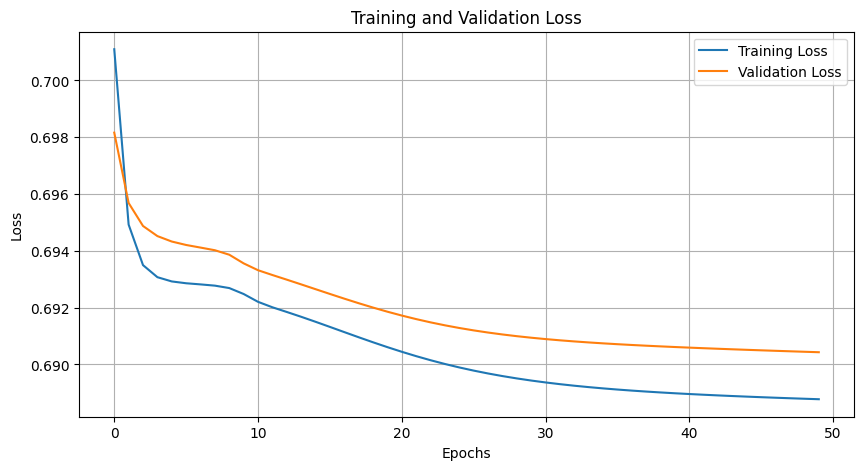

In [38]:
# График потерь на обучающей и проверочной выборках
plt.figure(figsize=(10, 5))

plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

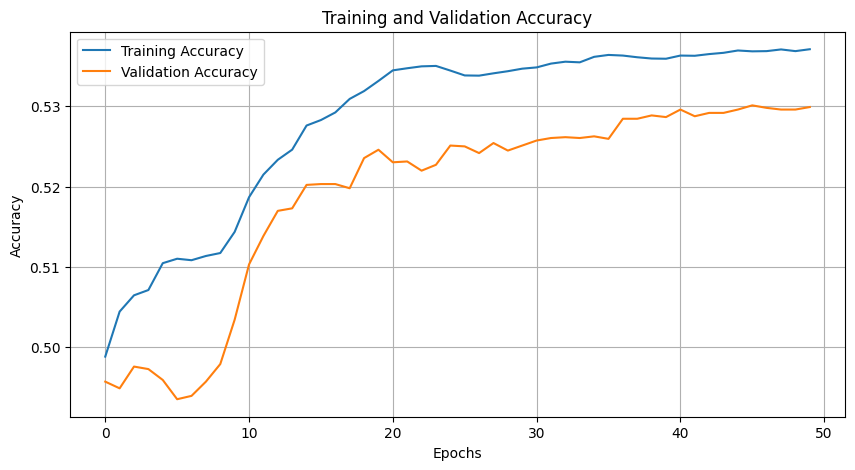

In [39]:
# График точности на обучающей и проверочной выборках
plt.figure(figsize=(10, 5))

plt.plot(train_acc, label="Training Accuracy")
plt.plot(valid_acc, label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()